# Heart Disease prediction using Deep Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

file_path = 'C:\\Users\\91898\\Desktop\\heart.csv'

#Loading the dataset into a pandas Dataframe
df = pd.read_csv('C:\\Users\\91898\\Desktop\\heart.csv')

The error message is a common issue when working with file paths in Python, especially on Windows systems. This error occurs because backslashes (\) in a string are interpreted as escape characters, and if Python encounters an invalid escape sequence (such as \U), it raises a SyntaxError.

In [2]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


There are no null entries in this dataset

In [3]:
print (df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


There are no duplicate rows either

In [4]:
df.loc[[34,99,224,334,901]]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
99,41,M,ATA,125,269,0,Normal,144,N,0.0,Up,0
224,55,M,ATA,120,256,1,Normal,137,N,0.0,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1


Using the 'loc' attribute to return specified rows.

In [5]:
df.size

11016

In [6]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [8]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
import seaborn as sns

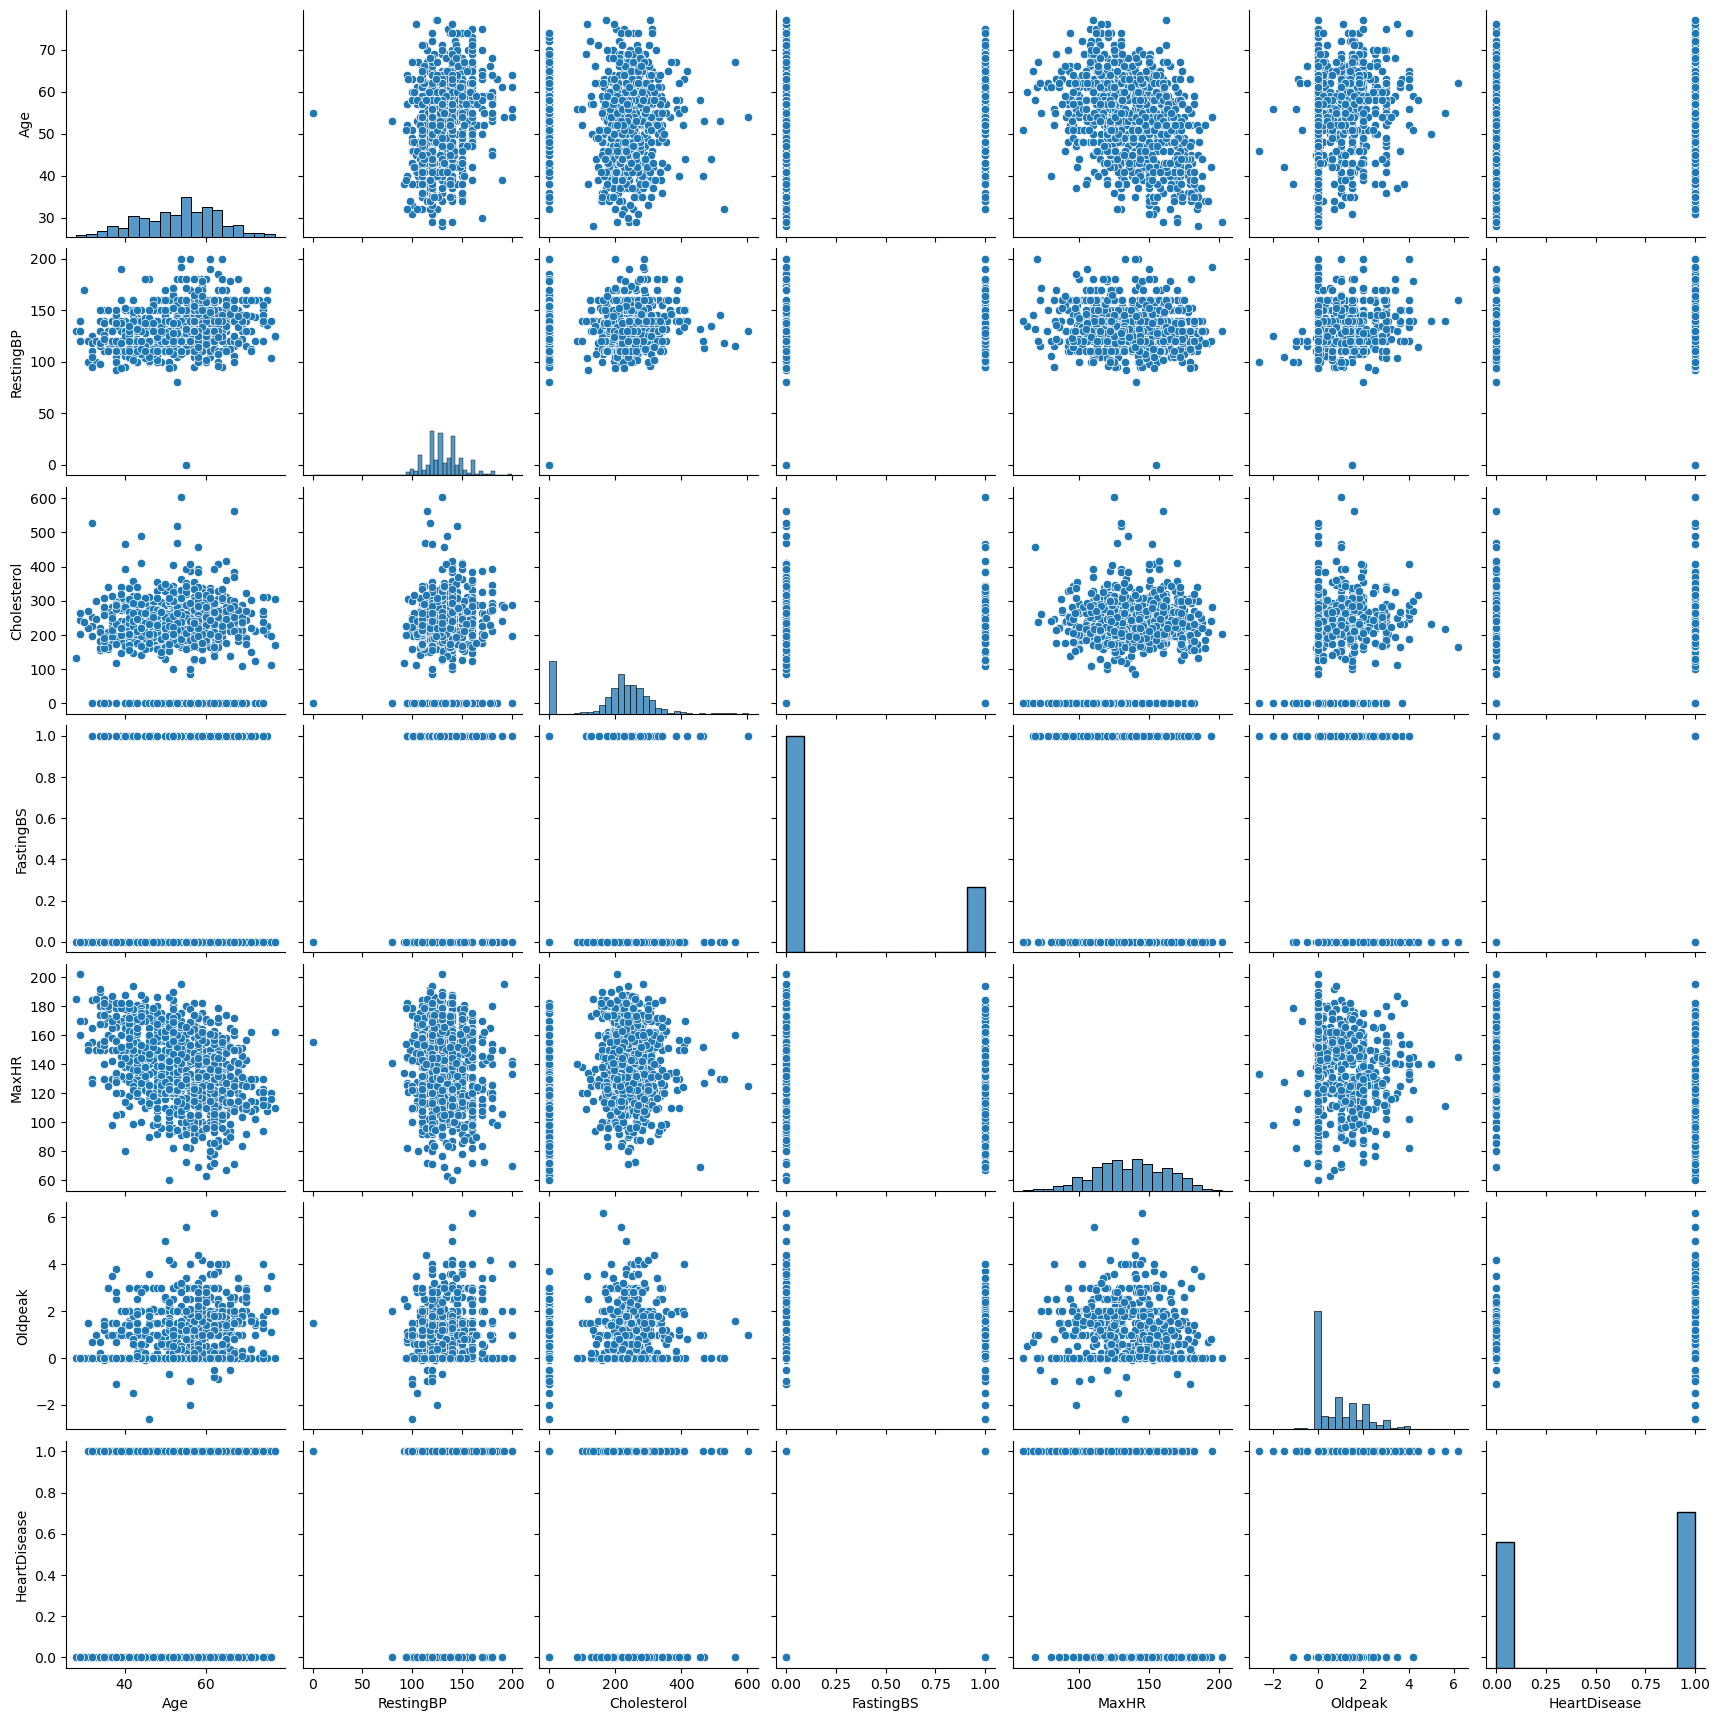

In [10]:
sns.pairplot(df)

Using the seaborn library to create pairplots.

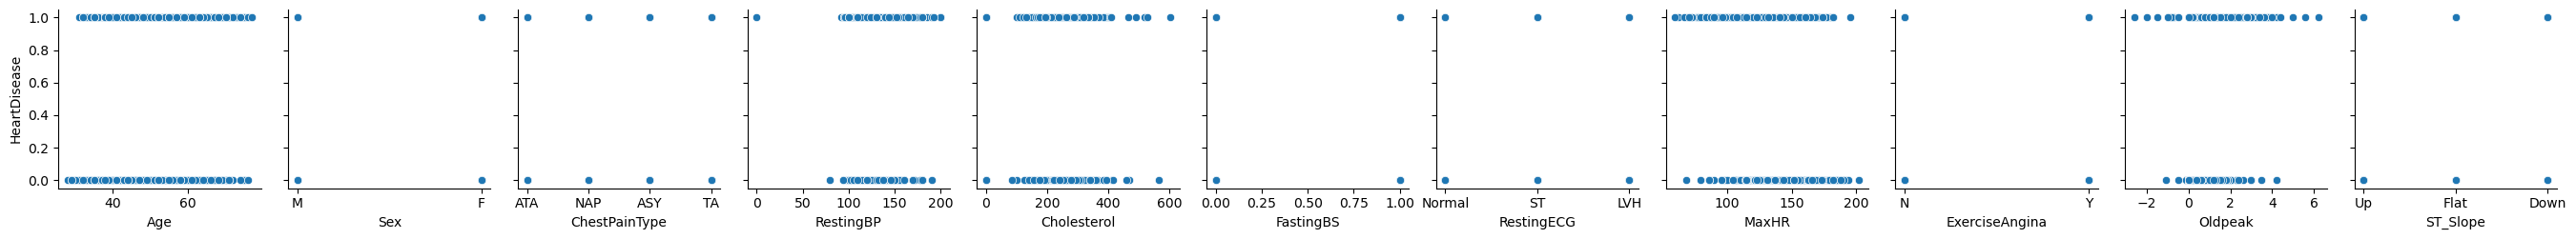

In [11]:
sns.pairplot(df,x_vars = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR',
                          'ExerciseAngina','Oldpeak','ST_Slope'], y_vars = ['HeartDisease'])

Checking the correlation of given factors with the occurence of heart disease in humans.

In [12]:
column_name = 'Cholesterol'  #Name of the column name we want to locate
column = df[column_name]  #Selecting the entire column
print(column)

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64


<Axes: xlabel='RestingECG'>

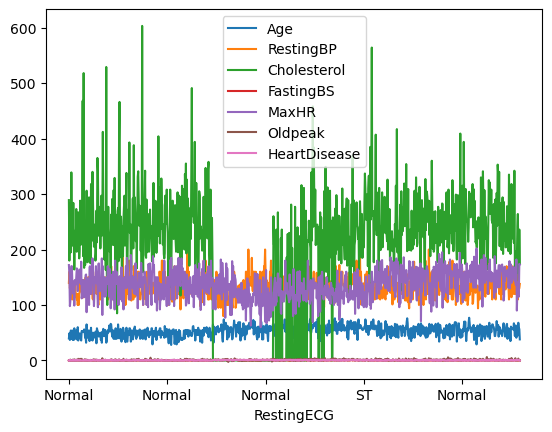

In [13]:
df.plot(6)

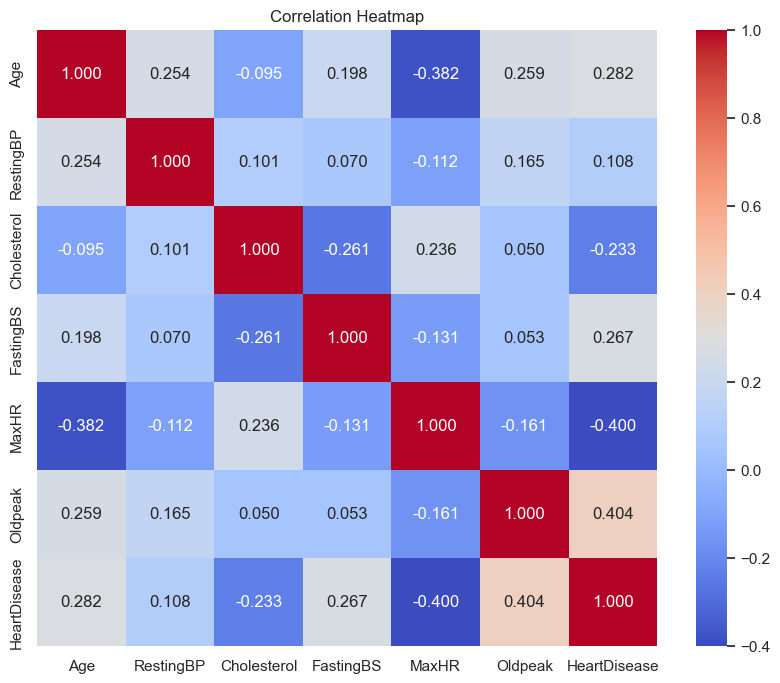

In [14]:
correlation_matrix = df.corr(numeric_only=True)  #Calculating the correlation matrix
sns.set(font_scale = 1.0)  #Customising the appearance of the heatmap
sns.set(rc= {'figure.figsize' : (10,8)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")  #Creating the Heatmap
plt.title('Correlation Heatmap')  #Showing the Heatmap
plt.show()

## Data visualisation: 
This will help us ascertain the necessary factors affecting heart diseases.

In [15]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df['Sex'] = df['Sex'].replace(['M','F'],['1','0'])
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['Y','N'],['1','0'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [17]:
df=df.drop(['Age', 'MaxHR', 'Cholesterol'],axis=1)

In [18]:
df

,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,ATA,140,0,Normal,0,0.0,Up,0
1,0,NAP,160,0,Normal,0,1.0,Flat,1
2,1,ATA,130,0,ST,0,0.0,Up,0
3,0,ASY,138,0,Normal,1,1.5,Flat,1
4,1,NAP,150,0,Normal,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...
913,1,TA,110,0,Normal,0,1.2,Flat,1
914,1,ASY,144,1,Normal,0,3.4,Flat,1
915,1,ASY,130,0,Normal,1,1.2,Flat,1
916,0,ATA,130,0,LVH,0,0.0,Flat,1


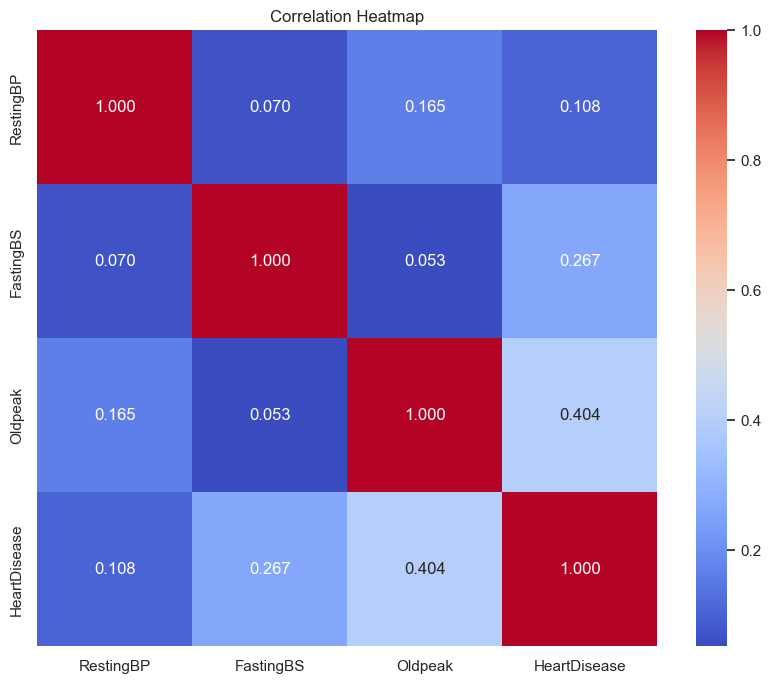

In [19]:
correlation_matrix = df.corr(numeric_only=True)  #Calculating the correlation matrix
sns.set(font_scale = 1.0)  #Customising the appearance of the heatmap
sns.set(rc= {'figure.figsize' : (10,8)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")  #Creating the Heatmap
plt.title('Correlation Heatmap')  #Showing the Heatmap
plt.show()

### NOTE
Whether dividing by 255.0 or using Min-Max scaling is better depends on your specific data and the context of your problem. Here's a brief comparison of the two methods:

Dividing by 255.0:

This method is commonly used when dealing with pixel values in image data, where the pixel values range from 0 to 255.
It's a simple linear transformation that scales the values between 0 and 1.
It assumes that the original data range is known and consistent (in this case, 0 to 255).
Min-Max Scaling:

Min-Max scaling scales the data to a fixed range (typically 0 to 1), regardless of the original data range.
It's more flexible and can handle data with varying ranges.
Min-Max scaling can be less sensitive to outliers compared to dividing by a fixed value like 255.0.

In [20]:
df['FastingBS'].unique()

array([0, 1], dtype=int64)

In [21]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [22]:
df['ChestPainType'] = df['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],['0','1','2','3'])
df['RestingECG'] = df['RestingECG'].replace(['Normal', 'ST', 'LVH'],['0','1','2'])
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat', 'Down'],['0','1','2'])
df

,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,0,140,0,0,0,0.0,0,0
1,0,1,160,0,0,0,1.0,1,1
2,1,0,130,0,1,0,0.0,0,0
3,0,2,138,0,0,1,1.5,1,1
4,1,1,150,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
913,1,3,110,0,0,0,1.2,1,1
914,1,2,144,1,0,0,3.4,1,1
915,1,2,130,0,0,1,1.2,1,1
916,0,0,130,0,2,0,0.0,1,1


In [23]:
df['ST_Slope'].unique()

array(['0', '1', '2'], dtype=object)

In [24]:
df['ExerciseAngina'].unique()

array(['0', '1'], dtype=object)

Replacing "yes" and "no" with 1 and 0 in a dataset for a neural network is a practical and common approach to handle binary classification tasks, ensuring compatibility, simplicity, and effectiveness in model training and evaluation.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    object 
 1   ChestPainType   918 non-null    object 
 2   RestingBP       918 non-null    int64  
 3   FastingBS       918 non-null    int64  
 4   RestingECG      918 non-null    object 
 5   ExerciseAngina  918 non-null    object 
 6   Oldpeak         918 non-null    float64
 7   ST_Slope        918 non-null    object 
 8   HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 64.7+ KB


### Performing feature normalisation.

Feature normalization, also known as feature scaling or data normalization, is a preprocessing technique used in machine learning and data analysis to rescale the values of features (variables) to a standardized range. The goal of feature normalization is to ensure that each feature contributes equally to model training and does not dominate due to differences in the scale or magnitude of their values. It helps in improving the convergence and performance of many machine learning algorithms. 

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and column_name is a list of column names you want to check and possibly convert to numeric
column_names = ['ChestPainType', 'RestingBP', 'RestingECG', 'Oldpeak', 'ST_Slope']

# Loop through each column name in the list
for col_name in column_names:
    # Check if the dtype of the column is 'object'
    if df[col_name].dtype == ['object', 'int64', 'float64']:
        # Convert the column to numeric
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
df[column_names] = scaler.fit_transform(df[column_names])

# Display the DataFrame
print(df)


    Sex  ChestPainType  RestingBP  FastingBS  RestingECG ExerciseAngina  \
0     1       0.000000       0.70          0         0.0              0   
1     0       0.333333       0.80          0         0.0              0   
2     1       0.000000       0.65          0         0.5              0   
3     0       0.666667       0.69          0         0.0              1   
4     1       0.333333       0.75          0         0.0              0   
..   ..            ...        ...        ...         ...            ...   
913   1       1.000000       0.55          0         0.0              0   
914   1       0.666667       0.72          1         0.0              0   
915   1       0.666667       0.65          0         0.0              1   
916   0       0.000000       0.65          0         1.0              0   
917   1       0.333333       0.69          0         0.0              0   

      Oldpeak  ST_Slope  HeartDisease  
0    0.295455       0.0             0  
1    0.409091      

## Model Training using Fed_Avg

In [27]:
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [28]:
from tqdm import tqdm 
import time

In [29]:
import numpy as np

def create_clients(data_dict):
    '''
    Return a dictionary with keys as client names and values as data and label lists.
    Args: data_dict: A dictionary where keys are client names, and values are tuples of data and labels.
                    For example, {'client_1': (data_1, labels_1), 'client_2': (data_2, labels_2), ...}
    Returns: A dictionary with keys as client names and values as tuples of data and label lists.
    '''
    return data_dict


import tensorflow as tf

# Defining data and labels for clients. This is the training data.
x1 = (df.iloc[0:250,:-1]) # data for client 1
y1 = (df.iloc[0:250, -1])  # labels for client 1
# y1 = to_categorical(y1, num_classes=2)

x2 = (df.iloc[250:490,:-1]) # data for client 2
y2 = (df.iloc[250:490, -1])  # labels for client 2
# y2 = to_categorical(y2, num_classes=2)

x3 = (df.iloc[490:730,:-1]) # data for client 3
y3 = (df.iloc[490:730,-1])  # labels for client 3
# y3 = to_categorical(y3, num_classes=2)

# Create the data_dict using the defined variables
data_dict = {
    'client1': (x1, y1),
    'client2': (x2, y2),
    'client3': (x3, y3)
}

# Defining the testing data
X_test = df.iloc[730:, :-1]  # Selecting all rows from index 730 to the end, excluding the last column
Y_test = df.iloc[730:, -1]   # Selecting all rows from index 730 to the end, only the last column
# Y_test = to_categorical(Y_test, num_classes=2)


In [30]:
X_test = X_test.astype('float32')   

In [31]:
from keras.utils import to_categorical
import numpy as np

#convert labels to one-hot encoding

y1 = to_categorical(y1)
y2 = to_categorical(y2)
y3 = to_categorical(y3)

Y_test = to_categorical(Y_test)

In [32]:
def test_model(X_test, Y_test,  model, comm_round):
    loss,accuracy=model.evaluate(X_test,Y_test)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, accuracy, loss))
    return accuracy, loss


def avg_weights(scaled_weight_list):
    '''Return the average of the listed scaled weights.'''
    num_clients = len(scaled_weight_list)

    if num_clients == 0:
        return None  # Handle the case where the list is empty

    avg_grad = list()

    # Get the sum of gradients across all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0) / num_clients
        avg_grad.append(layer_mean)

    return avg_grad

client_data = {
    'client_1': (x1,y1),
    'client_2': (x2,y2),
    'client_3': (x3,y3)
}

#create clients
clients_batched = create_clients(client_data)


In [33]:
client_names = list(clients_batched.keys())

In [34]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(128, input_shape=(shape,)))  # Input layer with 128 units
        model.add(Activation("relu"))
        model.add(Dense(64))                         # Hidden layer with 64 units
        model.add(Activation("relu"))
        model.add(Dense(32))                         # Hidden layer with 32 units
        model.add(Activation("relu"))
        model.add(Dense(2))                          # Output layer with 2 units
        model.add(Activation("softmax"))

        return model

In [35]:
# Create an instance of the SimpleMLP model
model = SimpleMLP.build(shape=11, classes=2)

# Compile the model with loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Get a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

In [36]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             250 non-null    object 
 1   ChestPainType   250 non-null    float64
 2   RestingBP       250 non-null    float64
 3   FastingBS       250 non-null    int64  
 4   RestingECG      250 non-null    float64
 5   ExerciseAngina  250 non-null    object 
 6   Oldpeak         250 non-null    float64
 7   ST_Slope        250 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 15.8+ KB


In [37]:
comms_round = 25  # Number of global epochs
acc3 = []

# Initialize the global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(X_test.shape[1], len(Y_test))
global_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Commence global training loop
for comm_round in range(comms_round):
    
    # Get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    # Initial list to collect local model weights after scaling
    scaled_local_weight_list = list()
    
    # Randomize client data - using keys
    client_names = list(clients_batched.keys())
    # random.shuffle(client_names)

#     lr = 0.01  # Learning rate
    loss = 'categorical_crossentropy'
    metrics = ['accuracy']
    optimizer = 'adam'
    
    # Loop through each client and create a new local model
    for client in tqdm(client_names, desc='Progress Bar'):
        data = client_data[client]
        
        # Create and compile the local model
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(X_test.shape[1], 2)
        local_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        
        # Set local model weights to the global model's weights
        local_model.set_weights(global_weights)
        
        X_train = np.array(clients_batched[client][0]).astype(np.float32)
        Y_train = np.array(clients_batched[client][1]).astype(np.float32)
        local_model.fit(
            X_train,
            Y_train,
            epochs=1,
            batch_size=32,
            verbose=2
        )
    

        # Append the weights of the local model to the list
        scaled_local_weight_list.append(local_model.get_weights())
        
        # Clear the session to free memory after each local training
        K.clear_session()

    # Calculate the average weights across all clients for each layer
    average_weights = avg_weights(scaled_local_weight_list)
    
    # Update the global model with the average weights
    global_model.set_weights(average_weights)
    
    # Test the global model and print out metrics after each communication round
    global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
    acc3.append(global_acc)


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.6822 - accuracy: 0.6120 - 1s/epoch - 137ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.24s/it]

8/8 - 1s - loss: 0.6161 - accuracy: 0.7375 - 858ms/epoch - 107ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.14s/it]

8/8 - 1s - loss: 0.6638 - accuracy: 0.6083 - 1s/epoch - 142ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]


6/6 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.4681
comm_round: 0 | global_acc: 46.809% | global_loss: 0.6802483201026917


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.6519 - accuracy: 0.6440 - 788ms/epoch - 98ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.03it/s]

8/8 - 1s - loss: 0.5447 - accuracy: 0.7542 - 1s/epoch - 139ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.18s/it]

8/8 - 1s - loss: 0.6321 - accuracy: 0.6042 - 844ms/epoch - 105ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.11s/it]

6/6 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.4681


comm_round: 1 | global_acc: 46.809% | global_loss: 0.6663103103637695


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.6153 - accuracy: 0.7280 - 800ms/epoch - 100ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.03it/s]

8/8 - 1s - loss: 0.4841 - accuracy: 0.7542 - 780ms/epoch - 97ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.02it/s]

8/8 - 1s - loss: 0.6054 - accuracy: 0.6125 - 701ms/epoch - 88ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]

6/6 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.5319


comm_round: 2 | global_acc: 53.191% | global_loss: 0.6388800740242004


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.5719 - accuracy: 0.8280 - 940ms/epoch - 118ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.14s/it]

8/8 - 1s - loss: 0.4365 - accuracy: 0.7958 - 1s/epoch - 132ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.22s/it]

8/8 - 1s - loss: 0.5677 - accuracy: 0.7250 - 1s/epoch - 137ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.24s/it]

6/6 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.7021


comm_round: 3 | global_acc: 70.213% | global_loss: 0.602389395236969


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.4975 - accuracy: 0.8960 - 1s/epoch - 135ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.25s/it]

8/8 - 1s - loss: 0.4121 - accuracy: 0.8417 - 995ms/epoch - 124ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.27s/it]

8/8 - 1s - loss: 0.5359 - accuracy: 0.7625 - 1s/epoch - 126ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.25s/it]

6/6 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.6915


comm_round: 4 | global_acc: 69.149% | global_loss: 0.5721749663352966


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.4422 - accuracy: 0.9120 - 781ms/epoch - 98ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.05it/s]

8/8 - 1s - loss: 0.3683 - accuracy: 0.8792 - 731ms/epoch - 91ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.09it/s]

8/8 - 1s - loss: 0.5151 - accuracy: 0.7750 - 935ms/epoch - 117ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.01it/s]

6/6 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7340
comm_round: 5 | global_acc: 73.404% | global_loss: 0.5512812733650208



Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.3990 - accuracy: 0.9000 - 1s/epoch - 166ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:03,  1.50s/it]

8/8 - 1s - loss: 0.3422 - accuracy: 0.9042 - 1s/epoch - 128ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.34s/it]

8/8 - 1s - loss: 0.4965 - accuracy: 0.7792 - 897ms/epoch - 112ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.27s/it]

1/6 [====>.........................] - ETA: 0s - loss: 0.5640 - accuracy: 0.7500

6/6 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.7500
comm_round: 6 | global_acc: 75.000% | global_loss: 0.5349301695823669


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.3627 - accuracy: 0.8800 - 837ms/epoch - 105ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.03s/it]

8/8 - 1s - loss: 0.3287 - accuracy: 0.9042 - 751ms/epoch - 94ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.02it/s]

8/8 - 1s - loss: 0.4878 - accuracy: 0.7792 - 758ms/epoch - 95ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.03it/s]

6/6 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7553
comm_round: 7 | global_acc: 75.532% | global_loss: 0.5295862555503845



Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.3269 - accuracy: 0.9080 - 956ms/epoch - 119ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.15s/it]

8/8 - 1s - loss: 0.3386 - accuracy: 0.9000 - 790ms/epoch - 99ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.07s/it]

8/8 - 1s - loss: 0.4841 - accuracy: 0.8000 - 925ms/epoch - 116ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.11s/it]

6/6 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7447


comm_round: 8 | global_acc: 74.468% | global_loss: 0.5346814393997192


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2990 - accuracy: 0.9160 - 787ms/epoch - 98ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.09it/s]

8/8 - 1s - loss: 0.3037 - accuracy: 0.9000 - 833ms/epoch - 104ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.01it/s]

8/8 - 1s - loss: 0.4740 - accuracy: 0.7958 - 723ms/epoch - 90ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]

6/6 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7660


comm_round: 9 | global_acc: 76.596% | global_loss: 0.5303453803062439


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2825 - accuracy: 0.9200 - 839ms/epoch - 105ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.01s/it]

8/8 - 1s - loss: 0.2973 - accuracy: 0.9042 - 932ms/epoch - 117ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.07s/it]

8/8 - 1s - loss: 0.4857 - accuracy: 0.7917 - 883ms/epoch - 110ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]

6/6 [==============================] - 0s 4ms/step - loss: 0.5474 - accuracy: 0.7500


comm_round: 10 | global_acc: 75.000% | global_loss: 0.5474068522453308


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2665 - accuracy: 0.9200 - 871ms/epoch - 109ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.02s/it]

8/8 - 1s - loss: 0.2859 - accuracy: 0.9042 - 785ms/epoch - 98ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.03it/s]

8/8 - 1s - loss: 0.4804 - accuracy: 0.8125 - 698ms/epoch - 87ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.06it/s]

6/6 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7766
comm_round: 11 | global_acc: 77.660% | global_loss: 0.5505512952804565



Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2505 - accuracy: 0.9120 - 773ms/epoch - 97ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.01it/s]

8/8 - 1s - loss: 0.3072 - accuracy: 0.8875 - 862ms/epoch - 108ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.08s/it]

8/8 - 1s - loss: 0.4807 - accuracy: 0.8125 - 1s/epoch - 173ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.23s/it]

6/6 [==============================] - 0s 4ms/step - loss: 0.5537 - accuracy: 0.7606


comm_round: 12 | global_acc: 76.064% | global_loss: 0.5537205338478088


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2527 - accuracy: 0.9200 - 850ms/epoch - 106ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.08s/it]

8/8 - 1s - loss: 0.2759 - accuracy: 0.9042 - 985ms/epoch - 123ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.12s/it]

8/8 - 1s - loss: 0.4958 - accuracy: 0.8125 - 838ms/epoch - 105ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]

6/6 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7660


comm_round: 13 | global_acc: 76.596% | global_loss: 0.561863362789154


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2428 - accuracy: 0.9160 - 855ms/epoch - 107ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.00s/it]

8/8 - 1s - loss: 0.2784 - accuracy: 0.9083 - 974ms/epoch - 122ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.08s/it]

8/8 - 1s - loss: 0.4798 - accuracy: 0.8208 - 814ms/epoch - 102ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]

6/6 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7660


comm_round: 14 | global_acc: 76.596% | global_loss: 0.5589052438735962


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2344 - accuracy: 0.9120 - 892ms/epoch - 112ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.06s/it]

8/8 - 1s - loss: 0.2686 - accuracy: 0.9167 - 1s/epoch - 135ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.21s/it]

8/8 - 1s - loss: 0.4845 - accuracy: 0.8208 - 993ms/epoch - 124ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]

6/6 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.7660


comm_round: 15 | global_acc: 76.596% | global_loss: 0.563796877861023


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2274 - accuracy: 0.9160 - 793ms/epoch - 99ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.03it/s]

8/8 - 1s - loss: 0.2690 - accuracy: 0.9000 - 786ms/epoch - 98ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.00it/s]

8/8 - 1s - loss: 0.4783 - accuracy: 0.8125 - 974ms/epoch - 122ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]

6/6 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7660


comm_round: 16 | global_acc: 76.596% | global_loss: 0.5640984773635864


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2199 - accuracy: 0.9200 - 809ms/epoch - 101ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:00<00:01,  1.03it/s]

8/8 - 1s - loss: 0.2585 - accuracy: 0.9125 - 808ms/epoch - 101ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.01it/s]

8/8 - 1s - loss: 0.4859 - accuracy: 0.8083 - 822ms/epoch - 103ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.00s/it]


6/6 [==============================] - 0s 4ms/step - loss: 0.5820 - accuracy: 0.7500
comm_round: 17 | global_acc: 75.000% | global_loss: 0.5820123553276062


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2157 - accuracy: 0.9240 - 865ms/epoch - 108ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.05s/it]

8/8 - 1s - loss: 0.2654 - accuracy: 0.9125 - 1s/epoch - 142ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.19s/it]

8/8 - 1s - loss: 0.4858 - accuracy: 0.8083 - 849ms/epoch - 106ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.14s/it]

6/6 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7394


comm_round: 18 | global_acc: 73.936% | global_loss: 0.5829007625579834


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2224 - accuracy: 0.9160 - 864ms/epoch - 108ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.05s/it]

8/8 - 1s - loss: 0.2639 - accuracy: 0.9208 - 1s/epoch - 165ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.32s/it]

8/8 - 1s - loss: 0.4868 - accuracy: 0.8083 - 903ms/epoch - 113ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.22s/it]

6/6 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7660


comm_round: 19 | global_acc: 76.596% | global_loss: 0.589845597743988


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2049 - accuracy: 0.9240 - 882ms/epoch - 110ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.09s/it]

8/8 - 1s - loss: 0.2839 - accuracy: 0.9000 - 883ms/epoch - 110ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.06s/it]

8/8 - 1s - loss: 0.4782 - accuracy: 0.8125 - 882ms/epoch - 110ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]

6/6 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7394


comm_round: 20 | global_acc: 73.936% | global_loss: 0.574195146560669


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2056 - accuracy: 0.9200 - 903ms/epoch - 113ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.05s/it]

8/8 - 1s - loss: 0.2745 - accuracy: 0.9042 - 987ms/epoch - 123ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.14s/it]

8/8 - 1s - loss: 0.4754 - accuracy: 0.8083 - 916ms/epoch - 115ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.13s/it]


6/6 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7606
comm_round: 21 | global_acc: 76.064% | global_loss: 0.5737736821174622


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2166 - accuracy: 0.9240 - 984ms/epoch - 123ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.20s/it]

8/8 - 1s - loss: 0.2577 - accuracy: 0.9167 - 909ms/epoch - 114ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.18s/it]

8/8 - 1s - loss: 0.4814 - accuracy: 0.8250 - 893ms/epoch - 112ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.17s/it]

6/6 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7340


comm_round: 22 | global_acc: 73.404% | global_loss: 0.5731838941574097


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2068 - accuracy: 0.9160 - 867ms/epoch - 108ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.03s/it]

8/8 - 1s - loss: 0.2739 - accuracy: 0.9125 - 923ms/epoch - 115ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.06s/it]

8/8 - 1s - loss: 0.4799 - accuracy: 0.8042 - 978ms/epoch - 122ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]

6/6 [==============================] - 0s 6ms/step - loss: 0.5776 - accuracy: 0.7340


comm_round: 23 | global_acc: 73.404% | global_loss: 0.5775575637817383


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

8/8 - 1s - loss: 0.2043 - accuracy: 0.9240 - 837ms/epoch - 105ms/step


Progress Bar:  33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.01s/it]

8/8 - 1s - loss: 0.2638 - accuracy: 0.9083 - 976ms/epoch - 122ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.08s/it]

8/8 - 1s - loss: 0.4784 - accuracy: 0.8208 - 911ms/epoch - 114ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]

6/6 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7500
comm_round: 24 | global_acc: 75.000% | global_loss: 0.5784273147583008


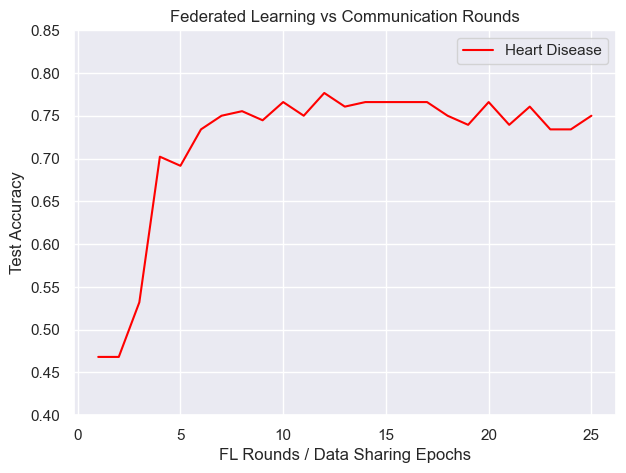

In [38]:
import matplotlib.pyplot as plt
# plt.plot(acc3)

# Data
x_values = range(1, len(acc3) + 1)
y_values = acc3

# Create the plot
plt.figure(figsize=(7, 5))  # Adjust the figure size
plt.plot(x_values, y_values, color='red', label='Heart Disease')
plt.title("Federated Learning vs Communication Rounds")
plt.grid(True)  # Use grid lines
plt.legend(loc='upper right')  # Specify the legend location
plt.ylim(0.40, 0.85)  # Set the y-axis limits
plt.xlabel("FL Rounds / Data Sharing Epochs")
plt.ylabel("Test Accuracy")

# Display or save the plot
plt.show()  # Display the plot in the Jupyter Notebook or script


In [39]:
acc3 = np.array(acc3)

In [40]:
np.save("acc_fedavg_heart.npy",acc3)

In [41]:
global_model.save("fedavg_heart.h5")

C:\Users\91898\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
b = np.load("acc_fedavg_heart.npy")